# 00 - General

## 0.1 - Imports

In [8]:
import warnings

import numpy as np
import pandas as pd
from IPython.display import HTML, display
from matplotlib import animation
from matplotlib import pyplot as plt
from scipy import stats

## 0.2 - Helper Functions

In [9]:
# Set display configuration
def jupyter_settings():
    plt.style.use("bmh")

    display(HTML("<style>.container { width:100% !important; }</style>"))
    pd.options.display.max_columns = 50
    pd.options.display.max_rows = 50
    pd.set_option("display.expand_frame_repr", False)

    warnings.filterwarnings("ignore")

    return None


jupyter_settings()

# 1.0 - Simulation

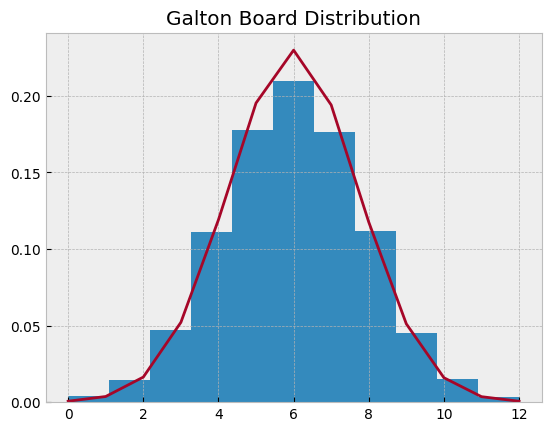

In [10]:
balls = 10000
levels = 12

results = []

for i in range(balls):
    path = np.random.randint(2, size=levels)
    final_position = np.sum(path)
    results.append(final_position)

r_std = np.std(results)
r_mean = np.mean(results)
results.sort()
pdf = stats.norm.pdf(results, r_mean, r_std)

plt.hist(results, density=True, bins=11)
plt.plot(results, pdf, color="C1")
plt.title("Galton Board Distribution")
plt.show()

# 2.0 - Save Animation

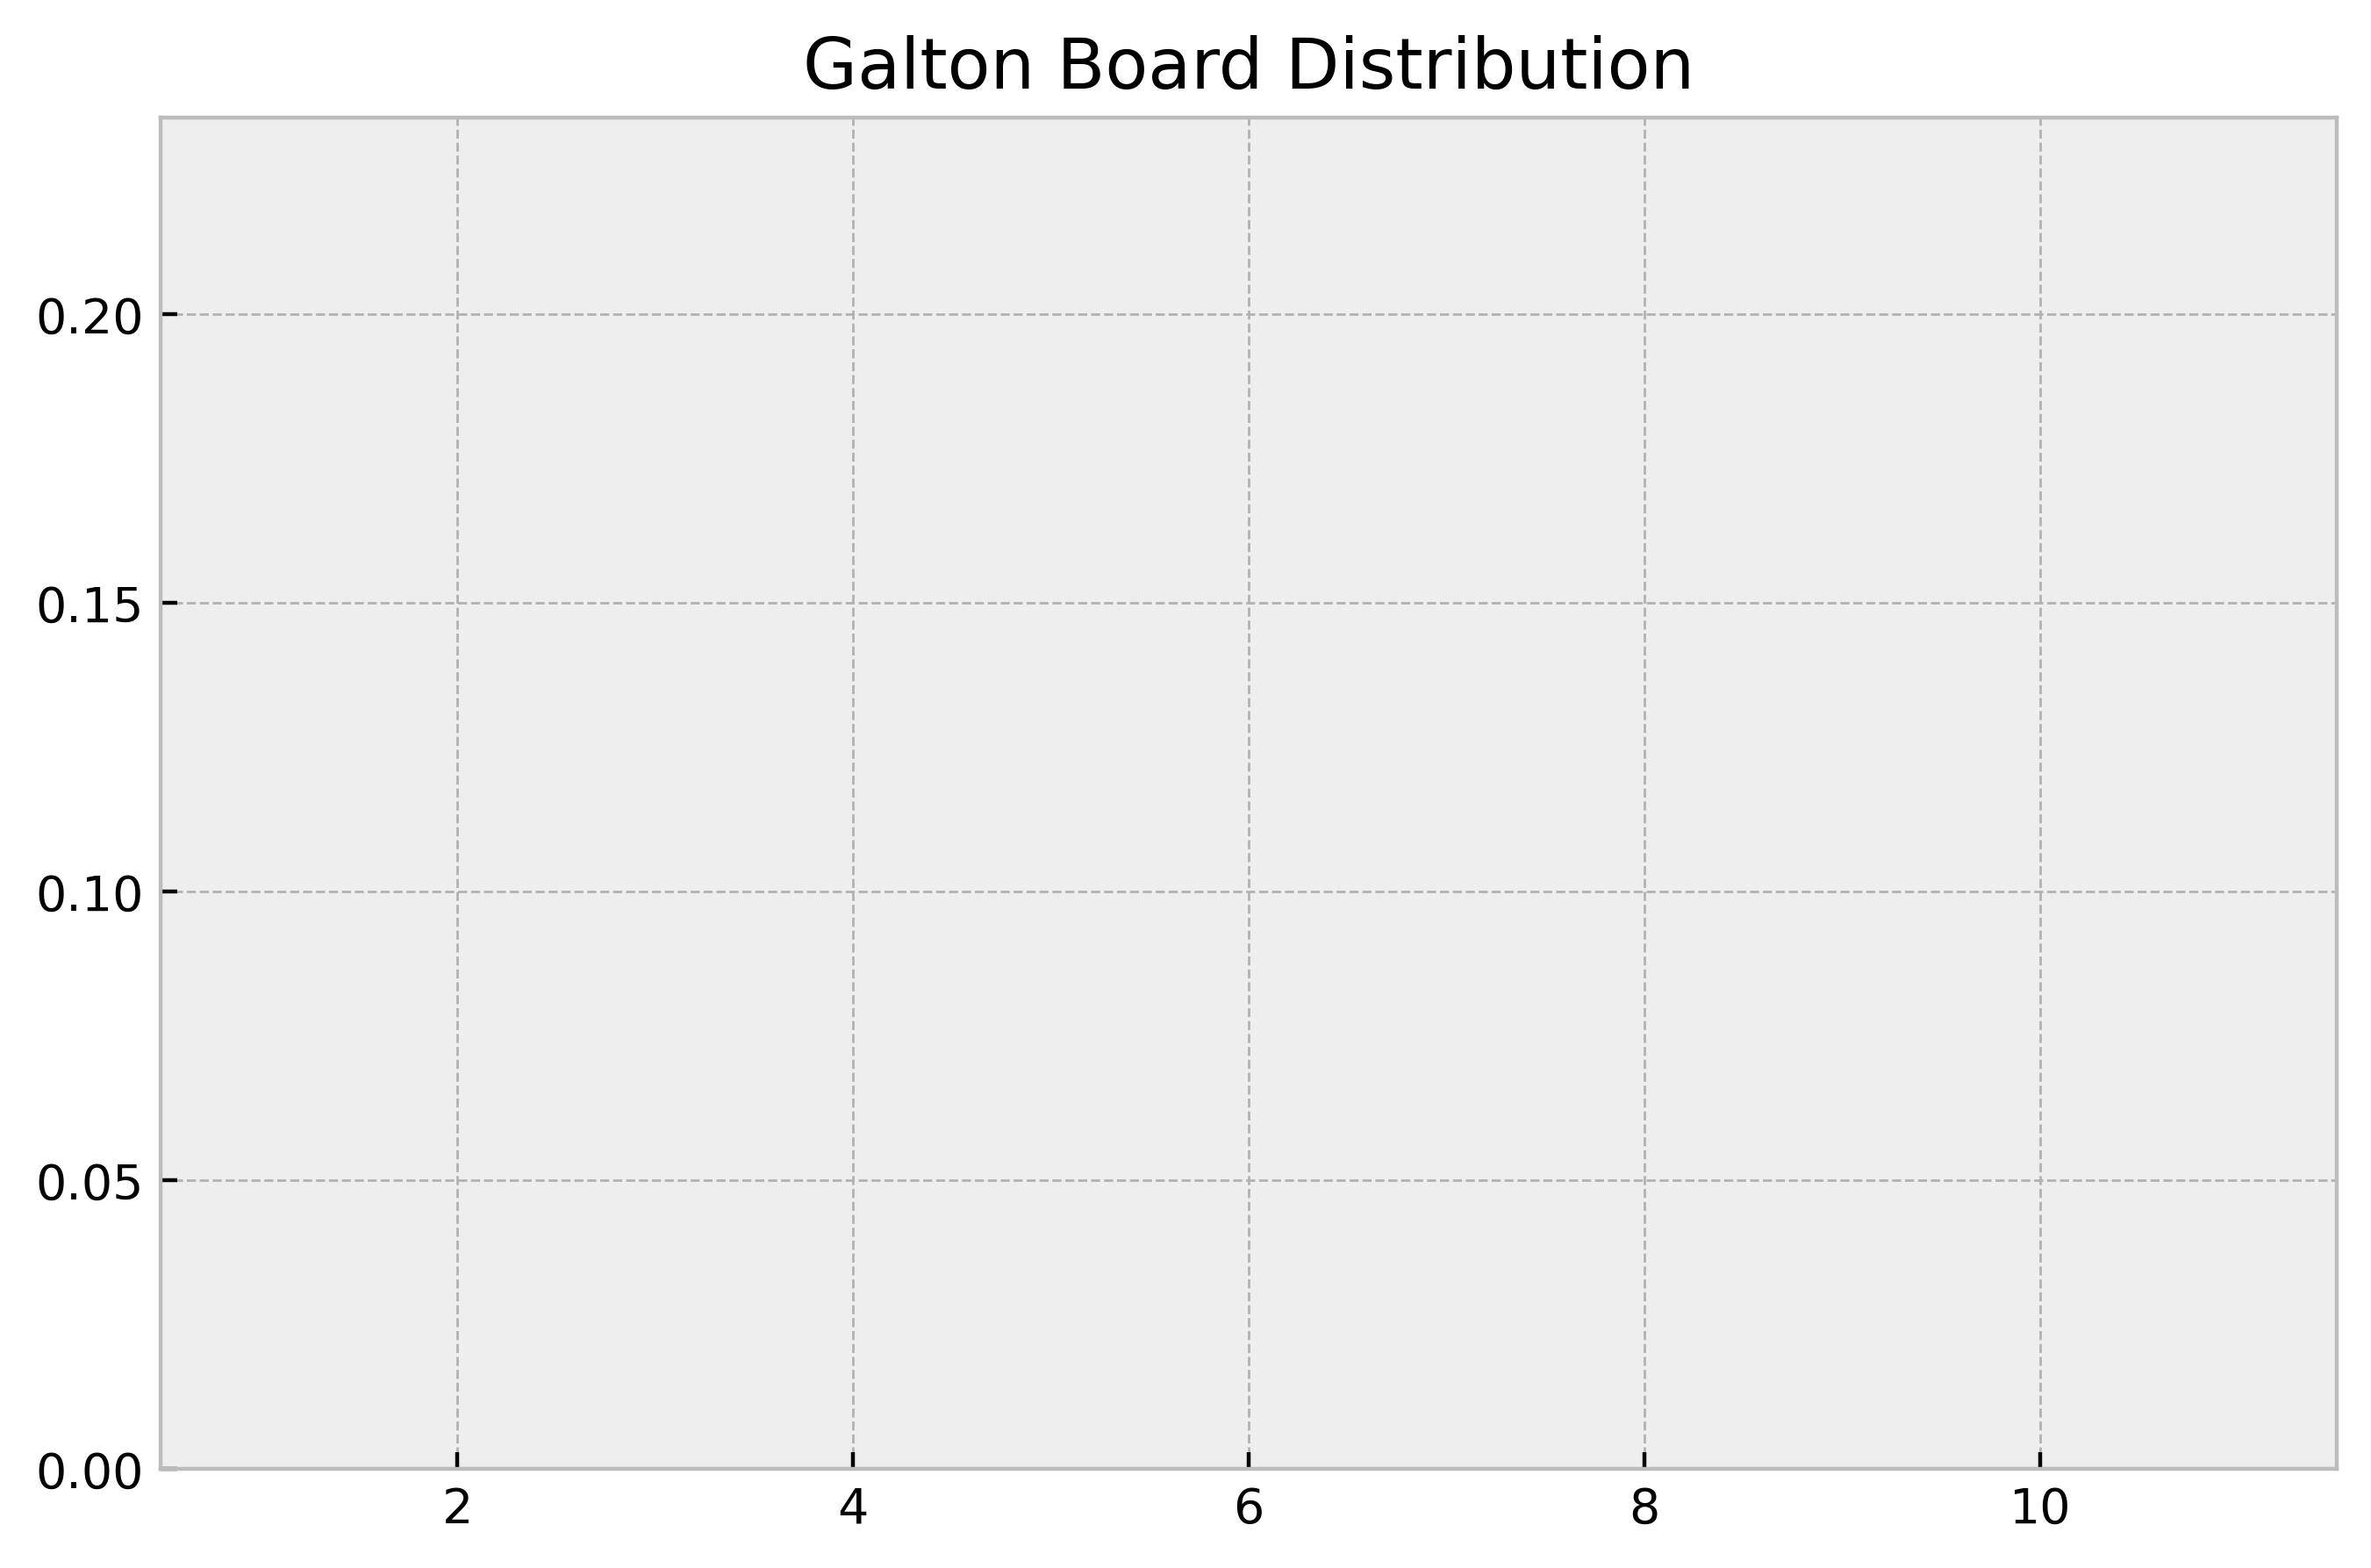

In [11]:
balls = 1000
results = []
final_position = []
test = []

for i in range(balls):
    path = np.random.randint(2, size=12)
    final_position.append(np.sum(path))


def animate(i, results, final_position):
    final_data = np.append(results, final_position[0:i])

    r_mean = np.mean(final_data)
    r_std = np.std(final_data)
    final_data.sort()

    pdf = stats.norm.pdf(final_data, r_mean, r_std)

    plt.cla()
    plt.hist(final_data, density=True)
    plt.plot(final_data, pdf, color="C1")
    plt.title("Galton Board Distribution")

    return None


fig = plt.figure(figsize=(8, 5), dpi=400)

ani = animation.FuncAnimation(
    fig, animate, len(final_position), fargs=(results, final_position), interval=50
)

ani.save("galton_board.mp4");